## Neste script foi aplicado o método de feature selection aos dados de treinamento (210 amostras) e validação (70 amostras) da orientanda de IC Evanuelli para utilizar no modelo SVM apenas os atributos mais relevantes

## v2: sem colunas de kurt e skew que estavam gerando nan. Agora com 133 colunas (incluindo DN e treino)

## neste script apago varcoef_b4 e var_coef_b5, que estavam com text, ficando 129 COLUNAS (exceto DN e treino)

## arquivos da pasta /media/ligia/Dados/data/utfpr/orientacao/ic_evanuelli_2021/arqs/evanuelli_atrib_terr

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm

from numpy import nan as NA

In [ ]:


from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
valid = pd.read_csv("/content/gdrive/MyDrive/obia_py_colab/terraview_evanuelli/validacao_sem_nan.csv")
segm = pd.read_csv("/content/gdrive/MyDrive/obia_py_colab/terraview_evanuelli/segmentos_sem_nan.csv")

<ipython-input-3-6578e5e20f78>:2: DtypeWarning: Columns (84,102) have mixed types. Specify dtype option on import or set low_memory=False.
  segm = pd.read_csv("/content/gdrive/MyDrive/obia_py_colab/terraview_evanuelli/segmentos_sem_nan.csv")


In [ ]:
trein = pd.read_csv("/content/gdrive/MyDrive/obia_py_colab/terraview_evanuelli/treinamento_sem_nan.csv")

In [ ]:
trein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Columns: 133 entries, DN to Treino
dtypes: float64(113), int64(20)
memory usage: 218.3 KB


In [ ]:
segm.loc[:,['VARCOEF_B5']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131863 entries, 0 to 131862
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   VARCOEF_B5  131863 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


In [ ]:
del segm['VARCOEF_B5']

In [ ]:
del segm['VARCOEF_B4']

In [ ]:
del trein['VARCOEF_B4']
del trein['VARCOEF_B5']

del valid['VARCOEF_B4']
del valid['VARCOEF_B5']

In [ ]:
del trein['VLDCNT_B4']
del valid['VLDCNT_B4']
del segm['VLDCNT_B4']

KeyError: ignored

In [ ]:
type(trein)

pandas.core.frame.DataFrame

In [ ]:
trein

,DN,AMPL_B0,COUNT_B0,MAX_VAL_B0,MEAN_B0,MEDIAN_B0,MIN_VAL_B0,MODE_B0,N_MOD_B0,STDDEV_B0,...,PBOX_WIDTH,POL_ANGLE,PELLIP_FIT,PGYRATIUS,POLRADIUS,PCIRCLE,PSAHPEIDX,PDENSITY,PRECTFIT,Treino
0,755,26.0,894,163.0,151.581655,152.0,137.0,152.0,1,2.573345,...,264.000000,0.510558,0.644417,142.835158,222.060687,0.630662,1.371245,257.659294,0.660754,6
1,1354,23.0,76,143.0,125.013158,123.5,120.0,123.0,1,4.538703,...,184.000000,-1.062128,0.490911,58.257375,113.413322,0.879631,2.122096,42.887378,0.527102,1
2,2960,50.0,13742,177.0,158.603478,159.0,127.0,157.0,1,5.541478,...,904.000000,1.342583,0.516089,602.367757,1113.748100,0.774313,3.177615,789.665096,0.521934,6
3,3338,30.0,6804,161.0,136.245297,136.0,131.0,136.0,1,1.569948,...,1008.000000,1.321141,0.666847,385.474214,526.190254,0.499379,1.860914,827.563789,0.682775,2
4,3538,18.0,579,138.0,132.053541,133.0,120.0,133.0,1,2.807966,...,576.000000,-1.409375,0.477739,161.293811,300.717249,0.869566,1.974033,123.225389,0.547474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,131673,54.0,27846,172.0,134.534044,133.0,118.0,131.0,1,6.265420,...,2353.766921,-1.194226,0.229427,1167.230154,2818.515588,0.928588,9.914334,632.324849,0.238416,4
206,131699,61.0,5253,181.0,134.201980,133.0,120.0,131.0,1,6.861050,...,1640.000000,1.539044,0.309064,544.654205,866.805046,0.857510,3.070419,388.022033,0.346144,4
207,131709,52.0,49830,174.0,141.353763,141.0,122.0,139.0,1,4.230746,...,2216.000000,-0.427387,0.475547,1077.617282,1898.354227,0.718369,4.537529,1679.608230,0.492427,2
208,131756,22.0,2342,143.0,129.861230,130.0,121.0,130.0,1,2.561495,...,528.000000,-0.111453,0.393902,256.314657,426.647490,0.737878,9.612498,351.335791,0.410890,4


In [ ]:
valid

,DN,AMPL_B0,COUNT_B0,MAX_VAL_B0,MEAN_B0,MEDIAN_B0,MIN_VAL_B0,MODE_B0,N_MOD_B0,STDDEV_B0,...,PBOX_WIDTH,POL_ANGLE,PELLIP_FIT,PGYRATIUS,POLRADIUS,PCIRCLE,PSAHPEIDX,PDENSITY,PRECTFIT,Treino
0,503,26.0,974,159.0,151.065708,151.0,133.0,152.0,1,2.235791,...,216.0,1.280659,0.688334,157.780042,239.905382,0.655246,1.538019,259.835771,0.693732,6
1,1116,21.0,712,142.0,132.953652,133.0,121.0,133.0,1,1.549679,...,368.0,1.114379,0.696335,135.404175,218.438244,0.696015,1.499063,208.608159,0.697492,1
2,2332,56.0,7007,180.0,143.657628,144.0,124.0,143.0,1,2.428000,...,688.0,0.609064,0.642025,405.803856,600.322340,0.603911,2.275773,747.012013,0.696382,2
3,5090,27.0,996,152.0,134.552209,134.0,125.0,133.0,1,4.706703,...,432.0,-0.563480,0.302363,208.453706,421.169287,0.885613,3.105249,151.350067,0.260945,4
4,5786,20.0,6156,149.0,134.010396,134.0,129.0,133.0,1,1.940853,...,1120.0,-0.682925,0.377725,424.880038,826.429316,0.816381,2.517200,476.730426,0.450256,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,127288,28.0,274,147.0,132.401460,133.0,119.0,133.0,1,3.531045,...,128.0,1.352580,0.611832,85.396806,156.604609,0.772400,1.600924,111.976270,0.570159,7
66,127601,25.0,579,149.0,134.290155,134.0,124.0,134.0,1,2.275663,...,264.0,-0.827668,0.668208,108.127278,182.444554,0.645638,1.371433,203.108283,0.595111,1
67,131357,52.0,1062,175.0,147.446328,149.0,123.0,151.0,1,6.594806,...,232.0,-0.068044,0.472558,176.074437,292.267629,0.746724,3.083925,232.553979,0.538540,6
68,131590,70.0,4919,192.0,134.399471,134.0,122.0,134.0,1,4.230787,...,472.0,0.067358,0.390491,425.869131,813.070640,0.848417,2.060295,387.193910,0.476416,1


In [ ]:
trein.dtypes

DN              int64
AMPL_B0       float64
COUNT_B0        int64
KURT_B0       float64
MAX_VAL_B0    float64
               ...   
PCIRCLE       float64
PSAHPEIDX     float64
PDENSITY      float64
PRECTFIT      float64
Treino          int64
Length: 145, dtype: object

In [ ]:
type(valid)

pandas.core.frame.DataFrame

In [ ]:
valid.dtypes

DN              int64
AMPL_B0       float64
COUNT_B0        int64
KURT_B0       float64
MAX_VAL_B0    float64
               ...   
PCIRCLE       float64
PSAHPEIDX     float64
PDENSITY      float64
PRECTFIT      float64
Treino          int64
Length: 145, dtype: object

In [ ]:
type(segm)

pandas.core.frame.DataFrame

In [ ]:
#segm.dtypes

type(segm['COUNT_B0'])

segm['COUNT_B0'].dtypes

dtype('int64')

In [ ]:
#type(segm['KURT_B0'])

segm['KURT_B0'].dtypes

dtype('O')

In [ ]:
trein


,DN,AMPL_B0,COUNT_B0,MAX_VAL_B0,MEAN_B0,MEDIAN_B0,MIN_VAL_B0,MODE_B0,N_MOD_B0,STDDEV_B0,...,PBOX_WIDTH,POL_ANGLE,PELLIP_FIT,PGYRATIUS,POLRADIUS,PCIRCLE,PSAHPEIDX,PDENSITY,PRECTFIT,Treino
0,755,26.0,894,163.0,151.581655,152.0,137.0,152.0,1,2.573345,...,264.000000,0.510558,0.644417,142.835158,222.060687,0.630662,1.371245,257.659294,0.660754,6
1,1354,23.0,76,143.0,125.013158,123.5,120.0,123.0,1,4.538703,...,184.000000,-1.062128,0.490911,58.257375,113.413322,0.879631,2.122096,42.887378,0.527102,1
2,2960,50.0,13742,177.0,158.603478,159.0,127.0,157.0,1,5.541478,...,904.000000,1.342583,0.516089,602.367757,1113.748100,0.774313,3.177615,789.665096,0.521934,6
3,3338,30.0,6804,161.0,136.245297,136.0,131.0,136.0,1,1.569948,...,1008.000000,1.321141,0.666847,385.474214,526.190254,0.499379,1.860914,827.563789,0.682775,2
4,3538,18.0,579,138.0,132.053541,133.0,120.0,133.0,1,2.807966,...,576.000000,-1.409375,0.477739,161.293811,300.717249,0.869566,1.974033,123.225389,0.547474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,131673,54.0,27846,172.0,134.534044,133.0,118.0,131.0,1,6.265420,...,2353.766921,-1.194226,0.229427,1167.230154,2818.515588,0.928588,9.914334,632.324849,0.238416,4
206,131699,61.0,5253,181.0,134.201980,133.0,120.0,131.0,1,6.861050,...,1640.000000,1.539044,0.309064,544.654205,866.805046,0.857510,3.070419,388.022033,0.346144,4
207,131709,52.0,49830,174.0,141.353763,141.0,122.0,139.0,1,4.230746,...,2216.000000,-0.427387,0.475547,1077.617282,1898.354227,0.718369,4.537529,1679.608230,0.492427,2
208,131756,22.0,2342,143.0,129.861230,130.0,121.0,130.0,1,2.561495,...,528.000000,-0.111453,0.393902,256.314657,426.647490,0.737878,9.612498,351.335791,0.410890,4


In [ ]:
valid

,DN,AMPL_B0,COUNT_B0,MAX_VAL_B0,MEAN_B0,MEDIAN_B0,MIN_VAL_B0,MODE_B0,N_MOD_B0,STDDEV_B0,...,PBOX_WIDTH,POL_ANGLE,PELLIP_FIT,PGYRATIUS,POLRADIUS,PCIRCLE,PSAHPEIDX,PDENSITY,PRECTFIT,Treino
0,503,26.0,974,159.0,151.065708,151.0,133.0,152.0,1,2.235791,...,216.0,1.280659,0.688334,157.780042,239.905382,0.655246,1.538019,259.835771,0.693732,6
1,1116,21.0,712,142.0,132.953652,133.0,121.0,133.0,1,1.549679,...,368.0,1.114379,0.696335,135.404175,218.438244,0.696015,1.499063,208.608159,0.697492,1
2,2332,56.0,7007,180.0,143.657628,144.0,124.0,143.0,1,2.428000,...,688.0,0.609064,0.642025,405.803856,600.322340,0.603911,2.275773,747.012013,0.696382,2
3,5090,27.0,996,152.0,134.552209,134.0,125.0,133.0,1,4.706703,...,432.0,-0.563480,0.302363,208.453706,421.169287,0.885613,3.105249,151.350067,0.260945,4
4,5786,20.0,6156,149.0,134.010396,134.0,129.0,133.0,1,1.940853,...,1120.0,-0.682925,0.377725,424.880038,826.429316,0.816381,2.517200,476.730426,0.450256,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,127288,28.0,274,147.0,132.401460,133.0,119.0,133.0,1,3.531045,...,128.0,1.352580,0.611832,85.396806,156.604609,0.772400,1.600924,111.976270,0.570159,7
66,127601,25.0,579,149.0,134.290155,134.0,124.0,134.0,1,2.275663,...,264.0,-0.827668,0.668208,108.127278,182.444554,0.645638,1.371433,203.108283,0.595111,1
67,131357,52.0,1062,175.0,147.446328,149.0,123.0,151.0,1,6.594806,...,232.0,-0.068044,0.472558,176.074437,292.267629,0.746724,3.083925,232.553979,0.538540,6
68,131590,70.0,4919,192.0,134.399471,134.0,122.0,134.0,1,4.230787,...,472.0,0.067358,0.390491,425.869131,813.070640,0.848417,2.060295,387.193910,0.476416,1


In [ ]:
trein.iloc[:, 1:129]

,AMPL_B0,COUNT_B0,MAX_VAL_B0,MEAN_B0,MEDIAN_B0,MIN_VAL_B0,MODE_B0,N_MOD_B0,STDDEV_B0,SUM_B0,...,P_COMPAC,PBOX_AREA,PBOX_PERIM,PBOX_LEN,PBOX_WIDTH,POL_ANGLE,PELLIP_FIT,PGYRATIUS,POLRADIUS,PCIRCLE
0,26.0,894,163.0,151.581655,152.0,137.0,152.0,1,2.573345,135514.0,...,0.000096,8.659200e+04,1184.000000,264.000000,264.000000,0.510558,0.644417,142.835158,222.060687,0.630662
1,23.0,76,143.0,125.013158,123.5,120.0,123.0,1,4.538703,9501.0,...,0.001745,2.060800e+04,592.000000,184.000000,184.000000,-1.062128,0.490911,58.257375,113.413322,0.879631
2,50.0,13742,177.0,158.603478,159.0,127.0,157.0,1,5.541478,2179529.0,...,0.000014,1.685056e+06,5536.000000,904.000000,904.000000,1.342583,0.516089,602.367757,1113.748100,0.774313
3,30.0,6804,161.0,136.245297,136.0,131.0,136.0,1,1.569948,927013.0,...,0.000017,8.064000e+05,3616.000000,1008.000000,1008.000000,1.321141,0.666847,385.474214,526.190254,0.499379
4,18.0,579,138.0,132.053541,133.0,120.0,133.0,1,2.807966,76459.0,...,0.000213,9.216000e+04,1472.000000,576.000000,576.000000,-1.409375,0.477739,161.293811,300.717249,0.869566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,54.0,27846,172.0,134.534044,133.0,118.0,131.0,1,6.265420,3746235.0,...,0.000022,1.009295e+07,13283.533841,2353.766921,2353.766921,-1.194226,0.229427,1167.230154,2818.515588,0.928588
206,61.0,5253,181.0,134.201980,133.0,120.0,131.0,1,6.861050,704963.0,...,0.000037,1.041688e+06,4550.351776,1640.000000,1640.000000,1.539044,0.309064,544.654205,866.805046,0.857510
207,52.0,49830,174.0,141.353763,141.0,122.0,139.0,1,4.230746,7043658.0,...,0.000006,6.807552e+06,10576.000000,2216.000000,2216.000000,-0.427387,0.475547,1077.617282,1898.354227,0.718369
208,22.0,2342,143.0,129.861230,130.0,121.0,130.0,1,2.561495,304135.0,...,0.000257,3.886080e+05,2528.000000,528.000000,528.000000,-0.111453,0.393902,256.314657,426.647490,0.737878


In [ ]:
trein.iloc[:, 132]

0      6
1      1
2      6
3      2
4      1
      ..
205    4
206    4
207    2
208    4
209    4
Name: Treino, Length: 210, dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)

X_fs=trein.drop('Treino',axis=1)
X_fs=X_fs.drop('DN',axis=1)
y_fs=trein['Treino']

selector.fit(X_fs, y_fs)

print('Number of input features:', selector.n_features_in_)
print('Input features Names  :', selector.feature_names_in_)
print('Input features scores :', selector.scores_)
print('Input features pvalues:', selector.pvalues_)
print('Output features Names :', selector.get_feature_names_out())

Number of input features: 131
Input features Names  : ['AMPL_B0' 'COUNT_B0' 'MAX_VAL_B0' 'MEAN_B0' 'MEDIAN_B0' 'MIN_VAL_B0'
 'MODE_B0' 'N_MOD_B0' 'STDDEV_B0' 'SUM_B0' 'VLDCNT_B0' 'VARCOEF_B0'
 'VAR_B0' 'CONTSE_B0' 'DISSE_B0' 'ENERGSE_B0' 'ENTRSE_B0' 'HOMOGSE_B0'
 'AMPL_B1' 'COUNT_B1' 'MAX_VAL_B1' 'MEAN_B1' 'MEDIAN_B1' 'MIN_VAL_B1'
 'MODE_B1' 'N_MOD_B1' 'STDDEV_B1' 'SUM_B1' 'VLDCNT_B1' 'VARCOEF_B1'
 'VAR_B1' 'CONTSE_B1' 'DISSE_B1' 'ENERGSE_B1' 'ENTRSE_B1' 'HOMOGSE_B1'
 'AMPL_B2' 'COUNT_B2' 'MAX_VAL_B2' 'MEAN_B2' 'MEDIAN_B2' 'MIN_VAL_B2'
 'MODE_B2' 'N_MOD_B2' 'STDDEV_B2' 'SUM_B2' 'VLDCNT_B2' 'VARCOEF_B2'
 'VAR_B2' 'CONTSE_B2' 'DISSE_B2' 'ENERGSE_B2' 'ENTRSE_B2' 'HOMOGSE_B2'
 'AMPL_B3' 'COUNT_B3' 'MAX_VAL_B3' 'MEAN_B3' 'MEDIAN_B3' 'MIN_VAL_B3'
 'MODE_B3' 'N_MOD_B3' 'STDDEV_B3' 'SUM_B3' 'VLDCNT_B3' 'VARCOEF_B3'
 'VAR_B3' 'CONTSE_B3' 'DISSE_B3' 'ENERGSE_B3' 'ENTRSE_B3' 'HOMOGSE_B3'
 'AMPL_B4' 'COUNT_B4' 'MAX_VAL_B4' 'MEAN_B4' 'MEDIAN_B4' 'MIN_VAL_B4'
 'MODE_B4' 'N_MOD_B4' 'STDDEV_B4' 'SUM_B

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 85  86  87  88  89 103 104 105 106 107] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
cols50 = ['MEAN_B0', 'MEDIAN_B0', 'MODE_B0', 'STDDEV_B0', 'VARCOEF_B0', 'CONTSE_B0',
'DISSE_B0', 'ENTRSE_B0', 'HOMOGSE_B0', 'MEAN_B1', 'MEDIAN_B1', 'MODE_B1',
'STDDEV_B1', 'VARCOEF_B1', 'CONTSE_B1', 'DISSE_B1', 'MEAN_B2', 'MEDIAN_B2',
'MODE_B2', 'STDDEV_B2', 'VARCOEF_B2', 'CONTSE_B2', 'DISSE_B2', 'MAX_VAL_B3',
'MEAN_B3', 'MEDIAN_B3', 'MIN_VAL_B3', 'MODE_B3', 'VARCOEF_B3', 'CONTSE_B3',
'DISSE_B3', 'MAX_VAL_B4', 'MEAN_B4', 'MEDIAN_B4', 'MIN_VAL_B4', 'MODE_B4',
'MAX_VAL_B5', 'MEAN_B5', 'MEDIAN_B5', 'MIN_VAL_B5', 'MODE_B5', 'STDDEV_B5',
'VAR_B5', 'BRATIO_B0', 'BRATIO_B1', 'BRATIO_B2', 'BRATIO_B3', 'BRATIO_B4',
'BRATIO_B5', 'P_PERARAT']

cols20 = ['VARCOEF_B0', 'VARCOEF_B1', 'MEAN_B2', 'MEDIAN_B2', 'VARCOEF_B2', 'MEAN_B3',
'MEDIAN_B3', 'MODE_B3', 'MEAN_B4', 'MEDIAN_B4', 'MODE_B4', 'MEAN_B5',
'MEDIAN_B5', 'MODE_B5', 'BRATIO_B0', 'BRATIO_B1', 'BRATIO_B2', 'BRATIO_B3',
'BRATIO_B4', 'BRATIO_B5']

cols10 = ['MEDIAN_B3', 'MEAN_B4', 'MEDIAN_B4', 'MODE_B4', 'MEAN_B5', 'MEDIAN_B5',
'BRATIO_B0', 'BRATIO_B1', 'BRATIO_B3', 'BRATIO_B5']

cols100 = ['AMPL_B0', 'COUNT_B0', 'MAX_VAL_B0', 'MEAN_B0', 'MEDIAN_B0', 'MIN_VAL_B0',
'MODE_B0', 'STDDEV_B0', 'SUM_B0', 'VLDCNT_B0', 'VARCOEF_B0', 'VAR_B0',
'CONTSE_B0', 'DISSE_B0', 'ENERGSE_B0', 'ENTRSE_B0', 'HOMOGSE_B0', 'AMPL_B1',
'COUNT_B1', 'MAX_VAL_B1', 'MEAN_B1', 'MEDIAN_B1', 'MIN_VAL_B1', 'MODE_B1',
'STDDEV_B1', 'SUM_B1', 'VLDCNT_B1', 'VARCOEF_B1', 'VAR_B1', 'CONTSE_B1',
'DISSE_B1', 'ENERGSE_B1', 'ENTRSE_B1', 'HOMOGSE_B1', 'AMPL_B2', 'COUNT_B2',
'MAX_VAL_B2', 'MEAN_B2', 'MEDIAN_B2', 'MIN_VAL_B2', 'MODE_B2', 'STDDEV_B2',
'SUM_B2', 'VLDCNT_B2', 'VARCOEF_B2', 'VAR_B2', 'CONTSE_B2', 'DISSE_B2',
'ENTRSE_B2', 'HOMOGSE_B2', 'AMPL_B3', 'COUNT_B3', 'MAX_VAL_B3', 'MEAN_B3',
'MEDIAN_B3', 'MIN_VAL_B3', 'MODE_B3', 'STDDEV_B3', 'SUM_B3', 'VLDCNT_B3',
'VARCOEF_B3', 'VAR_B3', 'CONTSE_B3', 'DISSE_B3', 'ENTRSE_B3', 'HOMOGSE_B3',
'COUNT_B4', 'MAX_VAL_B4', 'MEAN_B4', 'MEDIAN_B4', 'MIN_VAL_B4', 'MODE_B4',
'STDDEV_B4', 'SUM_B4', 'VLDCNT_B4', 'VAR_B4', 'COUNT_B5', 'MAX_VAL_B5',
'MEAN_B5', 'MEDIAN_B5', 'MIN_VAL_B5', 'MODE_B5', 'STDDEV_B5', 'SUM_B5',
'VLDCNT_B5', 'VAR_B5', 'BRATIO_B0', 'BRATIO_B1', 'BRATIO_B2', 'BRATIO_B3',
'BRATIO_B4', 'BRATIO_B5', 'P_AREA', 'P_FRACDIM', 'P_PERARAT', 'P_COMPAC',
'PBOX_PERIM', 'PGYRATIUS', 'PSAHPEIDX', 'PDENSITY']

cols = cols10



AttributeError: 'list' object has no attribute 'shape'

In [ ]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC




X = trein[cols]
#y = (trein["target"] == 1).astype(np.float64)
y = trein.iloc[:, 132]

svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
x_valid = valid[cols]

y_valid = valid.iloc[:, 132]

In [ ]:
#predição com os dados de validação

svm_clf.predict(x_valid)

array([7, 1, 2, 4, 2, 4, 2, 5, 2, 5, 4, 2, 7, 7, 6, 7, 2, 7, 4, 2, 6, 1,
       1, 5, 6, 5, 5, 2, 7, 2, 7, 5, 7, 5, 5, 7, 7, 5, 5, 1, 1, 1, 3, 4,
       3, 3, 3, 4, 3, 3, 3, 1, 5, 2, 5, 6, 4, 4, 3, 3, 1, 3, 4, 7, 2, 7,
       1, 6, 3, 4])

In [ ]:
segm.iloc[:,1:132]

,AMPL_B0,COUNT_B0,MAX_VAL_B0,MEAN_B0,MEDIAN_B0,MIN_VAL_B0,MODE_B0,N_MOD_B0,STDDEV_B0,SUM_B0,...,PBOX_LEN,PBOX_WIDTH,POL_ANGLE,PELLIP_FIT,PGYRATIUS,POLRADIUS,PCIRCLE,PSAHPEIDX,PDENSITY,PRECTFIT
0,0.0,1,133.0,133.000000,133.0,133.0,133.0,1,0.000000,133.0,...,8.000000,8.000000,1.570796,0.636620,5.656854,5.656854,0.363380,1.000000,11.313708,1.000000
1,0.0,1,150.0,150.000000,150.0,150.0,150.0,1,0.000000,150.0,...,8.000000,8.000000,0.000000,0.636620,5.656854,5.656854,0.363380,1.000000,11.313708,1.000000
2,0.0,1,153.0,153.000000,153.0,153.0,153.0,1,0.000000,153.0,...,8.000000,8.000000,1.570796,0.636620,5.656854,5.656854,0.363380,1.000000,11.313708,1.000000
3,0.0,1,143.0,143.000000,143.0,143.0,143.0,1,0.000000,143.0,...,8.000000,8.000000,0.000000,0.636620,5.656854,5.656854,0.363380,1.000000,11.313708,1.000000
4,0.0,1,154.0,154.000000,154.0,154.0,154.0,1,0.000000,154.0,...,8.000000,8.000000,0.000000,0.636620,5.656854,5.656854,0.363380,1.000000,11.313708,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131858,218.0,12918,335.0,136.497368,133.0,117.0,129.0,1,10.872303,1763273.0,...,1662.666667,1662.666667,-0.765072,0.260133,735.231623,1209.661777,0.820171,11.898760,683.399179,0.272051
131859,46.0,4452,164.0,132.613208,132.0,118.0,132.0,1,2.417636,590394.0,...,760.000000,760.000000,-1.336527,0.571826,326.977350,424.495913,0.496635,1.488669,671.284527,0.706155
131860,-1000.0,-1000,-1000.0,-1000.000000,-1000.0,-1000.0,-1000.0,-1000,-1000.000000,-1000.0,...,2.181818,2.181818,0.092932,0.413497,5.690678,8.032990,0.935425,1.822662,1.629643,0.500000
131861,11.0,4,139.0,132.500000,131.5,128.0,128.0,4,5.066228,530.0,...,15.272727,15.272727,0.066794,0.409144,14.167370,25.425121,0.865349,1.571202,10.755290,0.494737


In [ ]:
segmentos = segm[cols]

segmentos

,MEDIAN_B3,MEAN_B4,MEDIAN_B4,MODE_B4,MEAN_B5,MEDIAN_B5,BRATIO_B0,BRATIO_B1,BRATIO_B3,BRATIO_B5
0,200.0,0.369863,0.369863,0.369863,-0.342282,-0.342282,0.254289,0.187371,0.382389,-0.000654
1,214.0,0.247813,0.247813,0.247813,-0.273810,-0.273810,0.243913,0.198382,0.347982,-0.000445
2,208.0,0.165266,0.165266,0.165266,-0.249249,-0.249249,0.240977,0.196876,0.327602,-0.000393
3,190.0,0.187500,0.187500,0.187500,-0.266667,-0.266667,0.249598,0.191999,0.331634,-0.000465
4,221.0,0.181818,0.181818,0.181818,-0.273775,-0.273775,0.235507,0.192688,0.337968,-0.000419
...,...,...,...,...,...,...,...,...,...,...
131858,269.0,0.476293,0.481819,0.500000,-0.425055,-0.430501,0.225426,0.175151,0.443324,-0.000702
131859,286.0,0.534440,0.540616,0.500000,-0.460555,-0.463918,0.217626,0.171927,0.469326,-0.000756
131860,-1000.0,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
131861,262.5,0.502161,0.519893,0.431818,-0.424462,-0.439927,0.236258,0.176525,0.442204,-0.000757


In [ ]:
print(segmentos.shape)

(131863, 10)


In [ ]:


#segmentos = segmentos.reset_index()

segmentos = round(segmentos, 2)

#segmentos



In [ ]:
svm_lin_pred_segm = svm_clf.predict(segmentos)

In [ ]:
type(svm_lin_pred_segm)

numpy.ndarray

In [ ]:
np.savetxt("svm_lin_pred_segm_mai23_feat_sel_100cols.csv", np.asarray(svm_lin_pred_segm), delimiter=",")

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import matplotlib.pyplot as plt

In [ ]:
#acurácia no treinamento - Linear SVM

from sklearn.model_selection import cross_val_predict


y_train_svm_lin_pred = cross_val_predict(svm_clf, X, y, cv=3)

f1_val = f1_score(y, y_train_svm_lin_pred, average="macro")

acuracia = accuracy_score(y, y_train_svm_lin_pred)

kappa = cohen_kappa_score(y, y_train_svm_lin_pred)

print(
    "F1 = %0.5f - Acurácia =  %0.5f - Kappa =  %0.5f"
    % (f1_val, acuracia, kappa)
)

F1 = 0.80405 - Acurácia =  0.82381 - Kappa =  0.79444


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#acurácia na validação - Linear SVM


y_valid_svm_lin_pred = cross_val_predict(svm_clf, x_valid, y_valid, cv=3)


f1_val = f1_score(y_valid, y_valid_svm_lin_pred, average="macro")

acuracia = accuracy_score(y_valid, y_valid_svm_lin_pred)

kappa = cohen_kappa_score(y_valid, y_valid_svm_lin_pred)

print(
    "F1 = %0.5f - Acurácia =  %0.5f - Kappa =  %0.5f"
    % (f1_val, acuracia, kappa)
)

F1 = 0.73011 - Acurácia =  0.77143 - Kappa =  0.73333


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


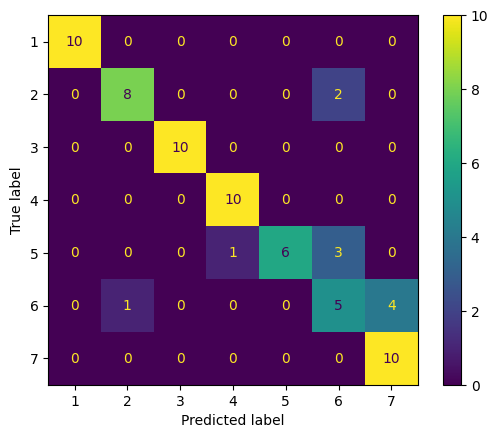

In [ ]:
#plot da matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_valid, y_valid_svm_lin_pred, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot()

plt.show()

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
svm_poly_pred_segm = poly_kernel_svm_clf.predict(segmentos)

In [ ]:
np.savetxt("svm_poly_pred_segm_mai23_feat_sel_100cols.csv", np.asarray(svm_poly_pred_segm), delimiter=",")

In [ ]:
#acurácia no treinamento - Poly SVM


y_train_svm_poly_pred = cross_val_predict(poly_kernel_svm_clf, X, y, cv=3)

f1_score(y, y_train_svm_poly_pred, average="macro")

0.9665580163849211

In [ ]:
#acurácia na validação - Poly SVM


y_valid_svm_poly_pred = cross_val_predict(poly_kernel_svm_clf, x_valid, y_valid, cv=3)

f1_score(y_valid, y_valid_svm_poly_pred, average="macro")

0.9577515216612963

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1, 'gamma': 0.1} with a score of 0.68


In [ ]:
rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=0.1))])

In [ ]:
svm_rbf_pred_segm = rbf_kernel_svm_clf.predict(segmentos)

In [ ]:
np.savetxt("svm_rbf_pred_gridsearchcv_mai23_feat_sel_10cols.csv", np.asarray(svm_rbf_pred_segm), delimiter=",")

In [ ]:
#acurácia no treinamento - RBF SVM


y_train_svm_rbf_pred = cross_val_predict(rbf_kernel_svm_clf, X, y, cv=3)

f1_score(y, y_train_svm_rbf_pred, average="macro")

0.8734257126929856

In [ ]:
#acurácia na validação - RBF SVM


y_valid_svm_rbf_pred = cross_val_predict(rbf_kernel_svm_clf, x_valid, y_valid, cv=3)

f1_score(y_valid, y_valid_svm_rbf_pred, average="macro")

0.8951664876476907